# __HAMOYE Data Science Internship: EXPLORATORY DATA ANALYSIS__

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid', {'grid.linestyle': '--'})


pd.options.display.max_rows = 15

In [2]:
data = pd.read_csv('fuel_data.csv')
data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
...,...,...,...,...,...,...,...,...,...,...,...
29516,f1_fuel_2018_12_12_0_8,12,2018,neil simpson unit 2,coal,ton,491913.0,16.100000,14.76,17.72,1.100
29517,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.068000,13.69,14.31,0.890


In [3]:
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [4]:
data['fuel_unit'].value_counts(dropna=False, normalize=True) * 100

mcf       38.458151
ton       30.342445
bbl       27.090743
gramsU     1.571656
mmbtu      0.609694
NaN        0.609694
kgU        0.372591
mwhth      0.338719
mwdth      0.321783
gal        0.284524
Name: fuel_unit, dtype: float64

The rows with null values in our dataset are less than 1% of the entire dataset. Therefore, we can conveniently drop the rows with null values without any consequential negative effect on our data analysis.

# __Data Cleaning__
---

In [5]:
# drop rows with null values
data.dropna(inplace=True)
# reset index
data.reset_index(drop=True, inplace=True)

In [6]:
data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
...,...,...,...,...,...,...,...,...,...,...,...
29336,f1_fuel_2018_12_12_0_8,12,2018,neil simpson unit 2,coal,ton,491913.0,16.100000,14.76,17.72,1.100
29337,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.068000,13.69,14.31,0.890


In the following cell, I have written a custom function to rename the columns with intuitive names that will ease understanding.

In [7]:
def pre_process(df):
    columns = {'utility_id_ferc1':'utility_id', 'plant_name_ferc1':'plant_name', 'fuel_type_code_pudl':'fuel_type',
          'fuel_qty_burned':'unit_burned', 'fuel_mmbtu_per_unit':'mmbtu_per_unit', 'fuel_cost_per_unit_burned':'cost_per_unit_burned',
          'fuel_cost_per_unit_delivered':'cost_per_unit_delivered', 'fuel_cost_per_mmbtu':'cost_per_mmbtu'}

    df = df.rename(columns, axis=1)
    return df

data = pre_process(data)
data

,record_id,utility_id,report_year,plant_name,fuel_type,fuel_unit,unit_burned,mmbtu_per_unit,cost_per_unit_burned,cost_per_unit_delivered,cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
...,...,...,...,...,...,...,...,...,...,...,...
29336,f1_fuel_2018_12_12_0_8,12,2018,neil simpson unit 2,coal,ton,491913.0,16.100000,14.76,17.72,1.100
29337,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.068000,13.69,14.31,0.890


In [8]:
data.columns

Index(['record_id', 'utility_id', 'report_year', 'plant_name', 'fuel_type',
       'fuel_unit', 'unit_burned', 'mmbtu_per_unit', 'cost_per_unit_burned',
       'cost_per_unit_delivered', 'cost_per_mmbtu'],
      dtype='object')

In the following cell, I have defined a custom function to engineer new features:
* total_energy_produced_mmbtu
* total_burning_cost
* cost_per_unit_burned_2

The __cost_per_unit_burned_2__ is supposed to be equal to the original feature __cost_per_unit_burned__.

In [9]:
def feature_engr(df):
    df['total_energy_produced_mmbtu'] = df['mmbtu_per_unit'] * df['unit_burned']
    df['total_burning_cost'] = df['unit_burned'] * df['cost_per_unit_burned']
    
    # generate the cost_per_unit_burned from other features
    df['cost_per_unit_burned_2'] = df['mmbtu_per_unit'] * df['cost_per_mmbtu']
    
    return df

data = feature_engr(data)

In [10]:
# check for disparities between the two values
error_rows = data[abs(data['cost_per_unit_burned'] - data['cost_per_unit_burned_2']) > 1]
(error_rows.shape[0] / data.shape[0]) * 100

9.487782435333811

From the above cell, it is noticed that the values are not equal for the two columns even though the columns refer to the same feature. The steps taken to manage this issue are:
* Setting the error margin to 1
* Drop any row that has an error margin greater than 1 (i.e the absolute difference between the two columns is greater than 1)

From analysis, the affected rows constitute just about 9.5% of the dataset. So we can conveniently drop such rows.

In [11]:
data.drop(error_rows.index, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
# drop the cost_per_unit_burned_2 column
data.drop('cost_per_unit_burned_2', axis=1, inplace=True)

In [13]:
data.describe()

,utility_id,report_year,unit_burned,mmbtu_per_unit,cost_per_unit_burned,cost_per_unit_delivered,cost_per_mmbtu,total_energy_produced_mmbtu,total_burning_cost
count,26559.000000,26559.000000,2.655900e+04,26559.000000,26559.000000,26559.000000,26559.000000,2.655900e+04,2.655900e+04
mean,117.729847,2005.892503,2.730890e+06,8.492323,33.573723,115.792306,6.220039,1.375836e+07,2.980206e+07
std,74.307108,6.995620,9.027620e+06,9.611732,35.161923,5357.241049,5.839725,9.054605e+07,1.505932e+08
min,1.000000,1994.000000,1.000000e+00,0.000001,-0.448000,-874.937000,-0.033000,9.800000e-05,-1.585920e+02
25%,55.000000,2000.000000,1.550050e+04,1.025000,5.127000,3.899000,2.098170,4.195928e+04,3.185936e+05
50%,121.000000,2006.000000,2.837620e+05,5.770842,24.460000,16.430000,4.301000,6.154767e+05,3.269287e+06
75%,175.000000,2012.000000,1.521914e+06,17.102000,45.081000,41.336000,7.743500,1.339193e+07,2.854423e+07
max,514.000000,2018.000000,5.558942e+08,121.843537,319.950000,730166.000000,107.000000,1.284783e+10,1.889485e+10


From the above descriptive statistics, there appears to be some negative values in our data set. Using the __total_burning_cost__ column, it is unreasonable for a the burning cost to be zero or negative.

Therefore, rows with zero or negative values for __total_burning_cost__ will be dropped.

In [14]:
# keep only rows where the total_burning_cost is greater than 0
data = data[data['total_burning_cost'] > 0]

In [15]:
data.describe()

,utility_id,report_year,unit_burned,mmbtu_per_unit,cost_per_unit_burned,cost_per_unit_delivered,cost_per_mmbtu,total_energy_produced_mmbtu,total_burning_cost
count,26443.000000,26443.000000,2.644300e+04,26443.000000,26443.000000,26443.000000,26443.000000,2.644300e+04,2.644300e+04
mean,117.727981,2005.912037,2.738784e+06,8.524061,33.721021,116.299318,6.239909,1.381833e+07,2.993280e+07
std,74.360000,6.991089,9.041682e+06,9.601292,35.168407,5368.973708,5.795609,9.073989e+07,1.509102e+08
min,1.000000,1994.000000,1.000000e+00,0.000001,0.028000,-874.937000,0.000000,3.000000e+00,1.155000e+01
25%,55.000000,2000.000000,1.540700e+04,1.025000,5.185000,3.939500,2.118000,4.260308e+04,3.291187e+05
50%,122.000000,2006.000000,2.839460e+05,5.772606,24.820000,16.580000,4.327000,6.338567e+05,3.345109e+06
75%,175.000000,2012.000000,1.530870e+06,17.120000,45.230500,41.515000,7.766000,1.350361e+07,2.874179e+07
max,514.000000,2018.000000,5.558942e+08,121.843537,319.950000,730166.000000,93.756000,1.284783e+10,1.889485e+10


On examining the descriptive statistics of the dataset, the __cost_per_unit_delivered__ column is not going to be useful for any analysis. This is because not enough information is provided in the dataset, to be able to derive insights from this feature.

In [16]:
data.isnull().sum()

record_id                      0
utility_id                     0
report_year                    0
plant_name                     0
fuel_type                      0
fuel_unit                      0
unit_burned                    0
mmbtu_per_unit                 0
cost_per_unit_burned           0
cost_per_unit_delivered        0
cost_per_mmbtu                 0
total_energy_produced_mmbtu    0
total_burning_cost             0
dtype: int64

# Data Visualization
___

In [17]:
fuel_group = data.groupby('fuel_type')
year_group = data.groupby('report_year')
plant_group = data.groupby('plant_name')

In [18]:
data.head()

,record_id,utility_id,report_year,plant_name,fuel_type,fuel_unit,unit_burned,mmbtu_per_unit,cost_per_unit_burned,cost_per_unit_delivered,cost_per_mmbtu,total_energy_produced_mmbtu,total_burning_cost
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,8.921254e+07,9.996752e+07
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.739994e+08,1.948474e+08
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,7.187562e+07,1.183133e+08
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,8.956064e+07,1.765410e+08
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,4.053300e+04,1.122764e+05


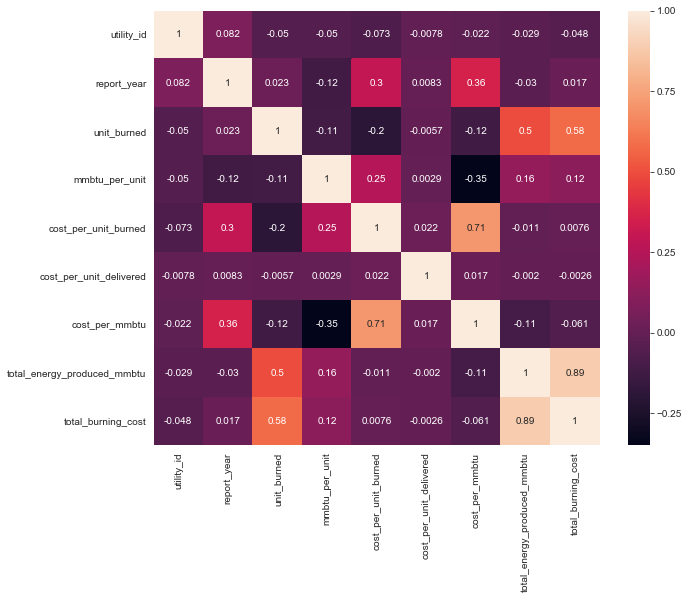

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [20]:
color = {"gas":"seagreen", "coal":"black", "oil":"darkorange", "nuclear":"indigo", "waste":"maroon", "other":'blue'}

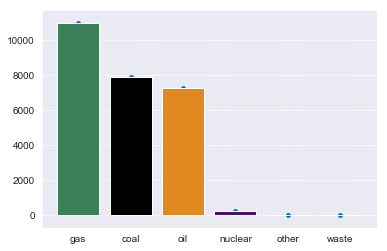

In [21]:
fuel_vc = data['fuel_type'].value_counts()
sns.barplot(fuel_vc.index, fuel_vc.values, data=data, palette=color)
sns.scatterplot(fuel_vc.index, fuel_vc.values, data=data, palette=color)

In [22]:
fuel_vc.values

array([10974,  7908,  7291,   234,    18,    18], dtype=int64)

#### __Quick Look at the Trend in the Cost Per MMBTU__
---

Text(0.5, 1.0, 'report_year Vs. Average cost_per_mmbtu')

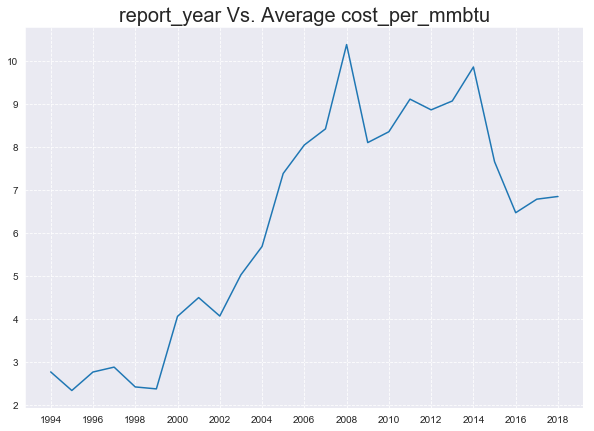

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
fc_per_yr = year_group['cost_per_mmbtu'].mean()
sns.lineplot(data=fc_per_yr, hue='cost_per_mmbtu')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.title('report_year Vs. Average cost_per_mmbtu', fontsize=20)

## __Exploring Trends in Fuel Types over the Years__
___

In other to provide clarity for the graphs, the I'll divide the dataset into two:
1. Containing years from 1994-2006
2. Containing years from 2007-2018

In [24]:
data['fuel_type'].unique()

array(['coal', 'gas', 'oil', 'nuclear', 'other', 'waste'], dtype=object)

### *Cost Per MMBTU*
For this analysis, I will make use of the Average __cost_per_mmbtu__ for each year.

Text(0.5, 1.0, 'report_year vs cost_per_mmbtu\n1994-2018')

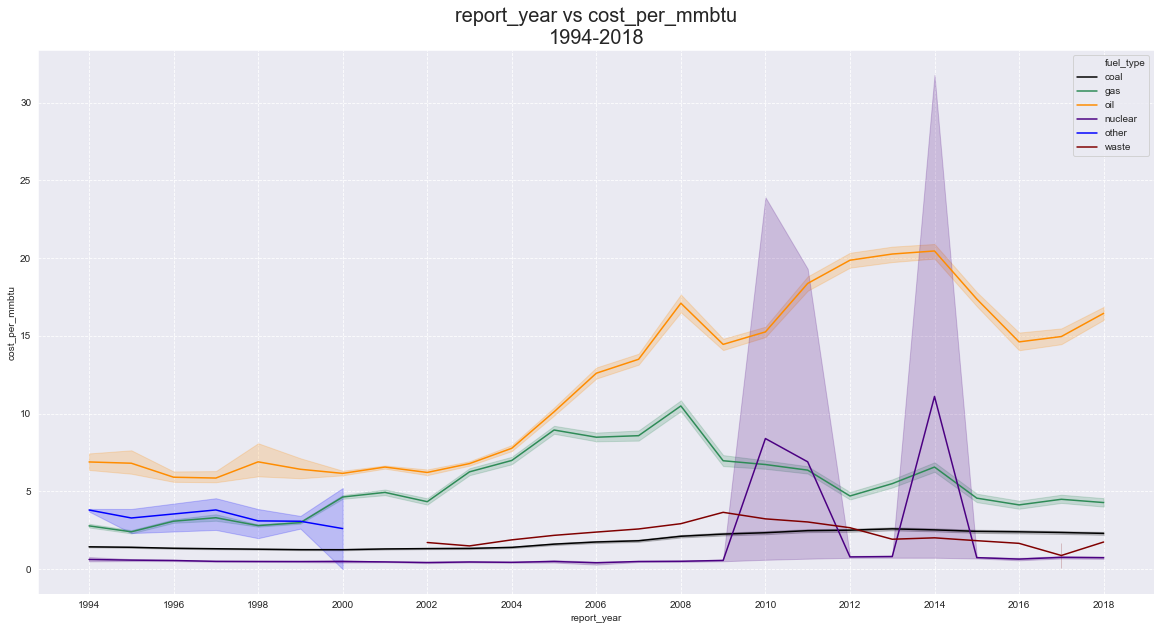

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='report_year', y='cost_per_mmbtu', hue='fuel_type', palette=color, data=data)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.title('report_year vs cost_per_mmbtu\n1994-2018', fontsize=20)

From the above graph, the following inferences can be made:
* The price of oil has risen steadily over the years, with a peak in the year 2014 followed by a sharp decline. It rises again at 2016, and this may be due to the forces of demand and supply.
* 'Other' fuel types were only in demand between the years 1994 and 2000.
* The utilization of 'Waste' as a fuel began sometime in 2002, with the cost being fairly constant over the years.
* The have been sharp increase and decline in the trend of 'Nuclear' as a source of energy.

### *Total Energy Produced MMBTU*

For this analysis, I will make use of the Average __total_energy_produced_mmbtu__ for each year.

Text(0.5, 1.0, 'report_year vs Average total_energy_produced_mmbtu\n1994-2018')

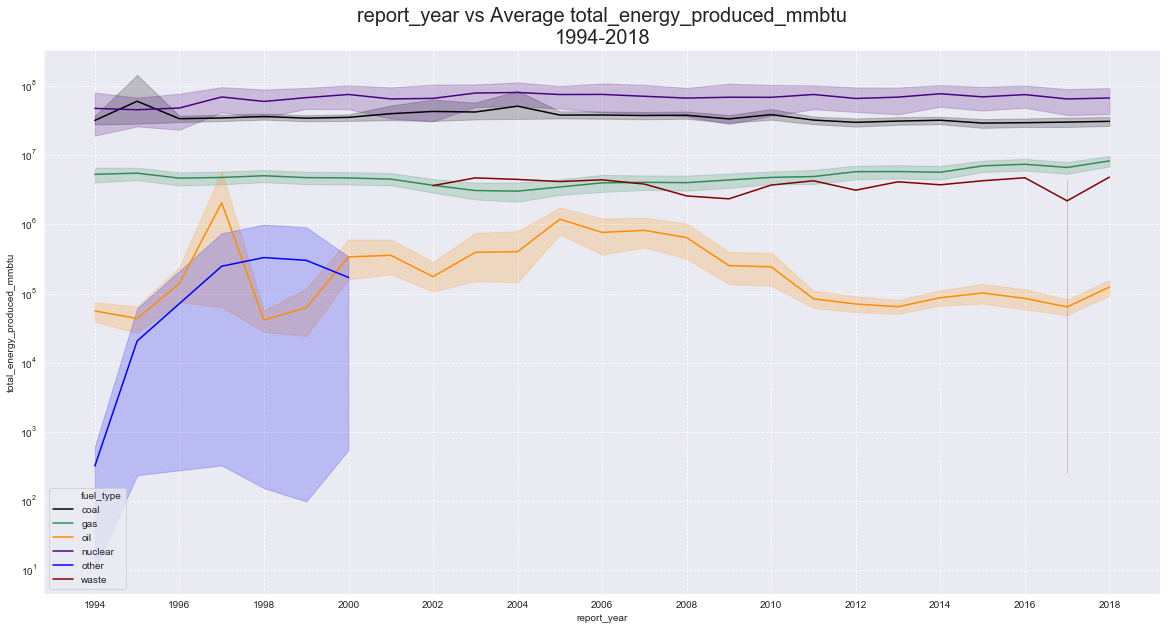

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='report_year', y='total_energy_produced_mmbtu', hue='fuel_type', palette=color, data=data).set_yscale("log")
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.title('report_year vs Average total_energy_produced_mmbtu\n1994-2018', fontsize=20)

* Nuclear and Coal have produced the highest amount of energy over the years.

### *Total Burning Cost*

For this analysis, I will make use of the Average __total_burning_cost__ for each year.

Text(0.5, 1.0, 'report_year vs Average total_burning_cost\n1994-2018')

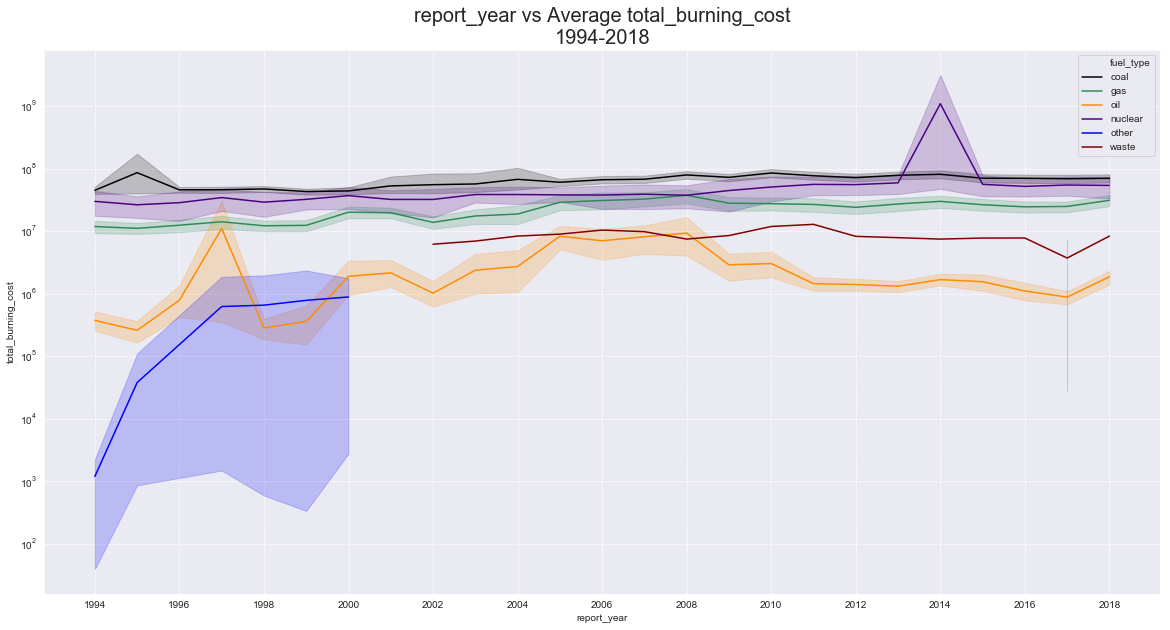

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='report_year', y='total_burning_cost', hue='fuel_type', palette=color, data=data).set_yscale("log")
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.title('report_year vs Average total_burning_cost\n1994-2018', fontsize=20)

* Waste has the lowest burning cost.


The graph below shows the pairplot of __total_energy_produced_mmbtu__ and __total_burning_cost__ against __cost_per_mmbtu__.

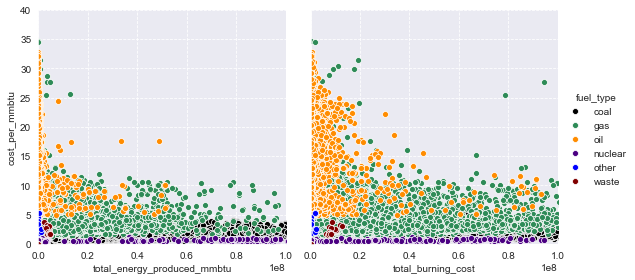

In [28]:
sns.pairplot(data=data, x_vars=['total_energy_produced_mmbtu', 'total_burning_cost'], 
             y_vars='cost_per_mmbtu', palette=color, hue='fuel_type',
             height=4, aspect=1, kind='scatter').set(xlim=(0,100000000)).set(ylim=(0,40))

In [29]:
data.corr()

,utility_id,report_year,unit_burned,mmbtu_per_unit,cost_per_unit_burned,cost_per_unit_delivered,cost_per_mmbtu,total_energy_produced_mmbtu,total_burning_cost
utility_id,1.000000,0.081695,-0.050157,-0.050404,-0.073488,-0.007811,-0.022102,-0.028605,-0.047921
report_year,0.081695,1.000000,0.023408,-0.117072,0.297154,0.008328,0.359182,-0.029836,0.016506
unit_burned,-0.050157,0.023408,1.000000,-0.109750,-0.196314,-0.005706,-0.122782,0.499005,0.582840
mmbtu_per_unit,-0.050404,-0.117072,-0.109750,1.000000,0.252335,0.002855,-0.349912,0.155155,0.121302
cost_per_unit_burned,-0.073488,0.297154,-0.196314,0.252335,1.000000,0.021951,0.714408,-0.010989,0.007633
cost_per_unit_delivered,-0.007811,0.008328,-0.005706,0.002855,0.021951,1.000000,0.017387,-0.001969,-0.002605
cost_per_mmbtu,-0.022102,0.359182,-0.122782,-0.349912,0.714408,0.017387,1.000000,-0.107006,-0.060942
total_energy_produced_mmbtu,-0.028605,-0.029836,0.499005,0.155155,-0.010989,-0.001969,-0.107006,1.000000,0.889088
total_burning_cost,-0.047921,0.016506,0.582840,0.121302,0.007633,-0.002605,-0.060942,0.889088,1.000000


The graph below shows a fairly linear relationship between the __total_energy_produced_mmbtu__ and __total_burning_cost__.

Text(0.5, 1.0, 'Total Burning Cost vs Total Energy Produced MMBTU')

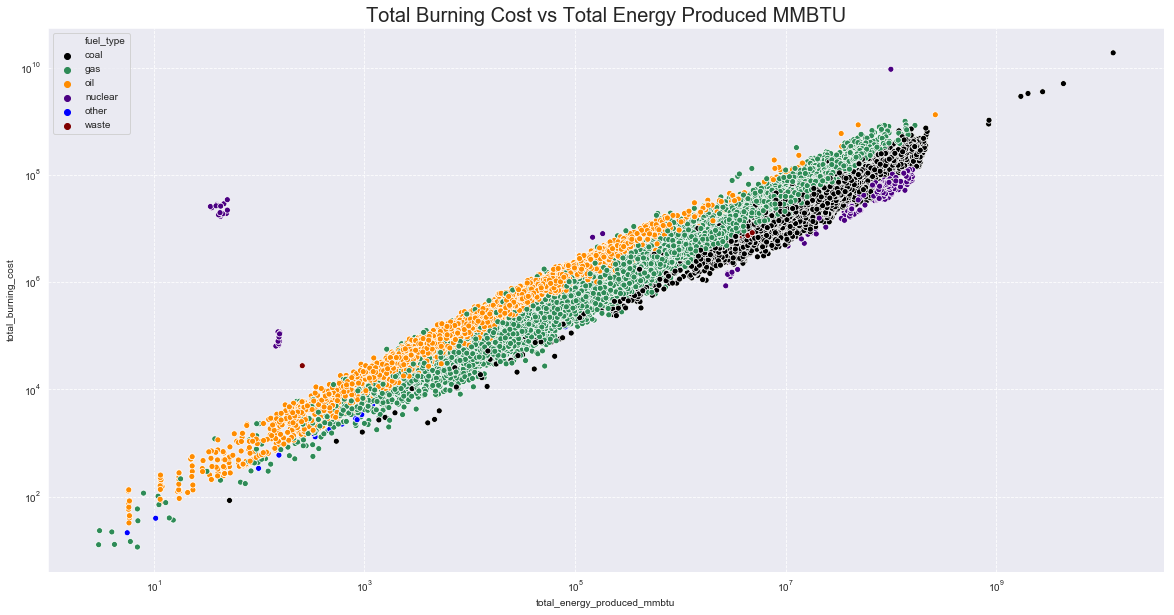

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
f = sns.scatterplot('total_energy_produced_mmbtu', 'total_burning_cost', data=data, palette=color, hue='fuel_type')
f.set_yscale("log")
f.set_xscale("log")
plt.title('Total Burning Cost vs Total Energy Produced MMBTU', fontsize=20)

### Operational Cost 
---

The operational cost will include:
* Total cost of burning
* Total cost of delivery

However, I am not able to carry out further analysis because the dataset does not contain any feature for the __cost per unit delivered__.

### Plants with the Highest Total Energy Produced
---

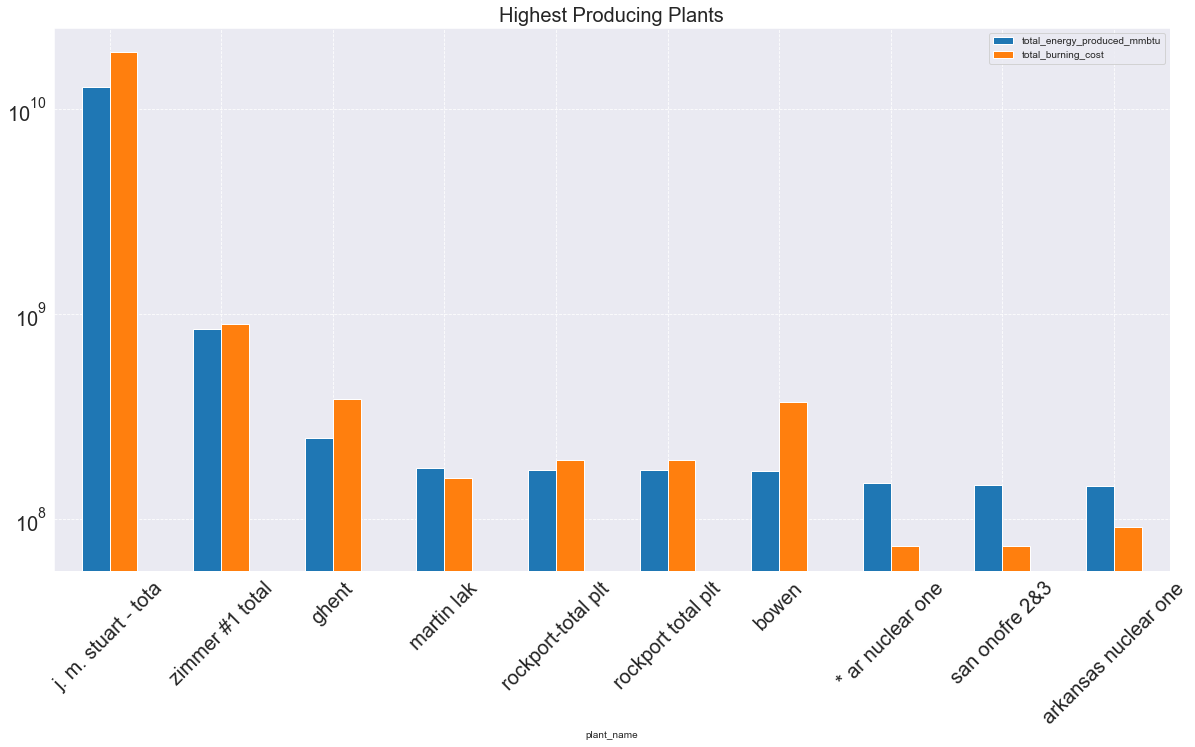

In [31]:
best_10 = plant_group.mean()[['total_energy_produced_mmbtu', 'total_burning_cost']].sort_values(by='total_energy_produced_mmbtu', ascending=False).head(10)

best_10.plot(kind='bar', figsize=(20,10), fontsize=20).set_yscale('log')
plt.title('Highest Producing Plants', fontsize=20)
plt.xticks(rotation=45)
plt.show()